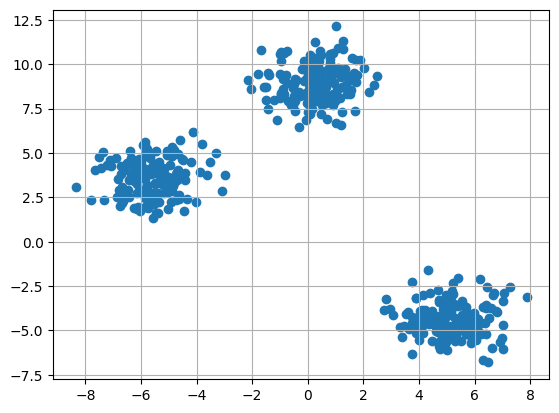

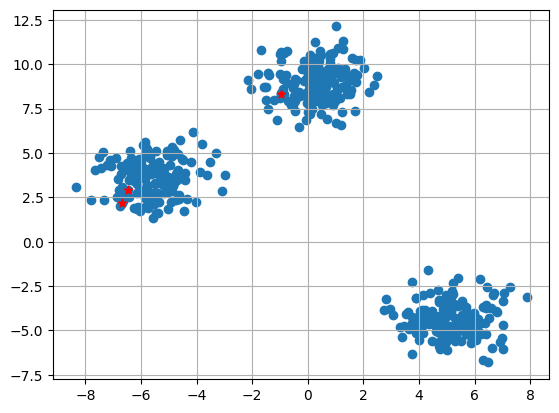

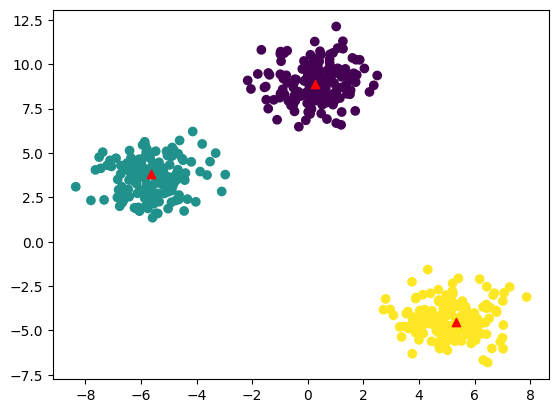

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

# Plot the dataset
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Number of clusters
k = 3

# Initialize clusters
clusters = {}
np.random.seed(23)

# Randomly choose initial medoids from the data points
initial_medoids_indices = np.random.choice(X.shape[0], k, replace=False)
for idx in range(k):
    medoid = X[initial_medoids_indices[idx]]
    cluster = {
        'medoid': medoid,
        'points': []
    }
    clusters[idx] = cluster

# Plot initial medoids
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
for i in clusters:
    medoid = clusters[i]['medoid']
    plt.scatter(medoid[0], medoid[1], marker='*', c='red')
plt.show()

# Distance function
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Implementing the E-step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['medoid'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

# Implementing the M-step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            # Compute the medoid (the point with the minimum average distance to all other points in the cluster)
            distances = np.zeros(points.shape[0])
            for j in range(points.shape[0]):
                distances[j] = np.sum([distance(points[j], point) for point in points])
            new_medoid_idx = np.argmin(distances)
            clusters[i]['medoid'] = points[new_medoid_idx]
            clusters[i]['points'] = []
    return clusters

def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['medoid']))
        pred.append(np.argmin(dist))
    return pred

# K-medoids algorithm
for _ in range(10):  # Number of iterations
    clusters = assign_clusters(X, clusters)
    clusters = update_clusters(X, clusters)

# Predict cluster assignments
pred = pred_cluster(X, clusters)

# Plot the final clusters and medoids
plt.scatter(X[:, 0], X[:, 1], c=pred)
for i in clusters:
    medoid = clusters[i]['medoid']
    plt.scatter(medoid[0], medoid[1], marker='^', c='red')
plt.show()
